# Exercise 1 - Regular expression warmup

In [ ]:
import re # opg 1.a
data_lines = ['# Measurements started',
              '250601231, 250601-1231']

pattern = re.compile('^(\d{2})(\d{2})(\d{2})-?(\d{4})')
match = pattern.search(data_lines[1])
if match:
    print(match.groups(1)) # all specified groups
    print(match.group(1))  # Group 0 -> entire matching str
    print(match.group(2))  # Group 0 -> entire matching str
    print(match.group(3)) # Group 1 -> first set of ()
    print(match.group()) # all specified groups
    


def get_century(IIII, yy):
    if IIII in range (0000,3999) and yy in range (00,99): 
        return "1900"
    if IIII in range (4000,4999) and yy in range (00,36): 
        return "2000"
    if IIII in range (4000,4999) and yy in range (37,99): 
        return "1900"
    if IIII in range (5000,8999) and yy in range (00,57): 
        return "2000"
    if IIII in range (5000,8999) and yy in range (58,99): 
        return "1800"
    if IIII in range (9000,9999) and yy in range (00,36): 
        return "2000"
    if IIII in range (9000,9999) and yy in range (37,99): 
        return "1900"


yy = int(match.group(3))

IIII = int(match.group(4))

print(get_century(IIII, yy))




# Exercise 2 - Processing the FakeNewsCorpus data set

In [ ]:

import csv
import re
from cleantext import clean



with open('news_sample.csv', 'r') as input_file, open('redacted_news_sample.csv','w', newline = '') as output_file :
    csv_reader = csv.reader(input_file)
    csv_writer = csv.writer(output_file)
    for row in csv_reader:
        new_row = [cell.lower() for cell in row]
        csv_writer.writerow(new_row)


with open('redacted_news_sample.csv', 'r') as file:
    text = file.read()
    text = text.replace('\n', '')
    text = text.replace('  ',' ')
    text = text.replace('  ',' ')
    text = re.sub(r'-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)', '<URL>', text)
    text = re.sub(r'^\w+@[a-zA-Z_]+?\.[a-zA-Z]{2,3}$','<MAIL>', text)
    text = re.sub(r'(\d{4})-?(\d{2})-?(\d{2})','<DATE>', text)
    text = re.sub(r'(\d+)','<NUM>', text)
    


# sætter ændringer ind i redacted
with open('redacted_news_sample.csv', 'w') as file:
    file.write(text)

clean(text, 
    fix_unicode=True, 
    to_ascii=True, 
    lower=True, 
    no_line_breaks=True, 
    no_urls=True, 
    no_emails=True, 
    no_phone_numbers=True, 
    no_numbers=True, 
    no_digits=True, 
    no_currency_symbols=True, 
    no_punct=True, 
    replace_with_url="<URL>", 
    replace_with_email="<MAIL>", 
    replace_with_phone_number="<PHONE>", 
    replace_with_number="<NUM>", 
    replace_with_digit="0", 
    replace_with_currency_symbol="<CUR>", 
    lang="en")



# Exercise 3 - Descriptive frequency analysis of the data

28808
29484


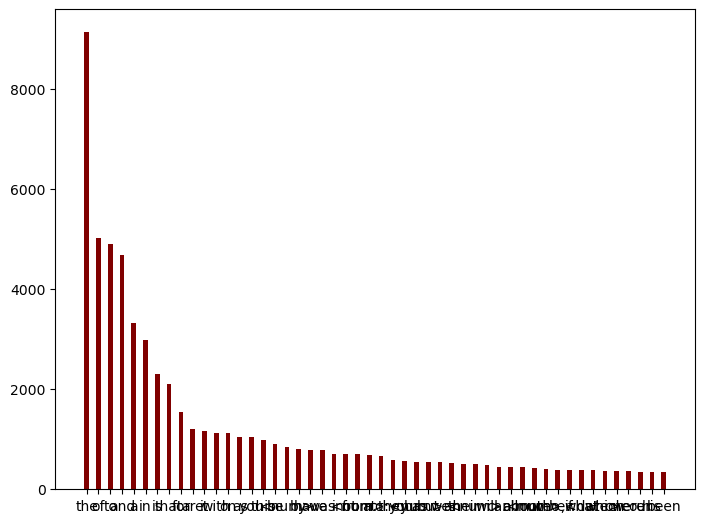

In [52]:

import numpy as np
import matplotlib.pyplot as plt 
import itertools


def countUniqueWords(filename):

    file = open(filename, 'r')
    read_file = file.read().lower()
    words_in_file = read_file.split()  
    count_map = {}
    for i in words_in_file:
        if i in count_map:
            count_map[i] += 1  
        else:
            count_map[i] = 1
    return count_map  

print ((len(countUniqueWords('news_sample.csv'))))
print ((len(countUniqueWords('redacted_news_sample.csv'))))

#calculate the frequency of words in the file
SortOrder = dict(sorted(countUniqueWords('news_sample.csv').items(), key=lambda x: x[1], reverse=True))
SortOrder1 = dict(sorted(countUniqueWords('redacted_news_sample.csv').items(), key=lambda x: x[1], reverse=True))

PlotDict = dict(itertools.islice(SortOrder1.items(), 50))

#plot the frequency of words in the file
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Words = list((PlotDict).keys())
Occurences = list((PlotDict).values())
ax.bar(Words, Occurences, color ='maroon', width = 0.4)
plt.show()

